# 🎬 Netflix Titles Data Analysis with Python

**Objective:**  
Explore Netflix's movie and TV show catalog to uncover insights about content type, genres, release trends, and country contributions.

**Dataset Source:**  
[Kaggle: Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)

**Tools:** Python, Pandas, Matplotlib, Seaborn, Jupyter Notebook


## 📦 Step 1: Import Libraries
We import Pandas for data handling and Seaborn/Matplotlib for visualization.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## 📂 Step 2: Load Netflix Dataset
Let’s read the CSV file into a Pandas DataFrame and view the first few rows.


In [4]:
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##  Data Cleaning
- Check for missing values
- Convert date columns to datetime format
- Extract year/month added
- Clean `duration` and separate Movies vs TV Shows

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
df.dropna(subset=['date_added','rating','duration'],inplace=True) 
#drop rows with missing key values

df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
#convert date added to datetime

df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
#extract year and month

df['genre']=df['listed_in'].apply(lambda x:  x.split(',')[0])
#simplify genre to first genre

#create a numeric duration column
df['duration_mins']=df[df['type']=='Movie']['duration'].str.extract('(\d+)').astype(float)

## 🎥 Movies vs TV Shows Count

Let’s compare the number of Movies and TV Shows available on Netflix.


C:\Users\pgaya\AppData\Local\Temp\ipykernel_21052\263855201.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='type',palette='Set2')


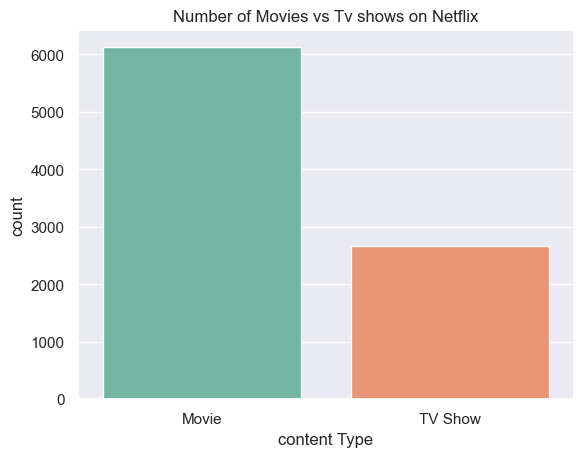

In [12]:
sns.countplot(data=df,x='type',palette='Set2')
plt.title('Number of Movies vs Tv shows on Netflix')
plt.xlabel('content Type')
plt.ylabel('count')
plt.show()

## 📈  Year-wise Content Addition

How has Netflix’s content library grown over time? Let’s visualize content added by year.


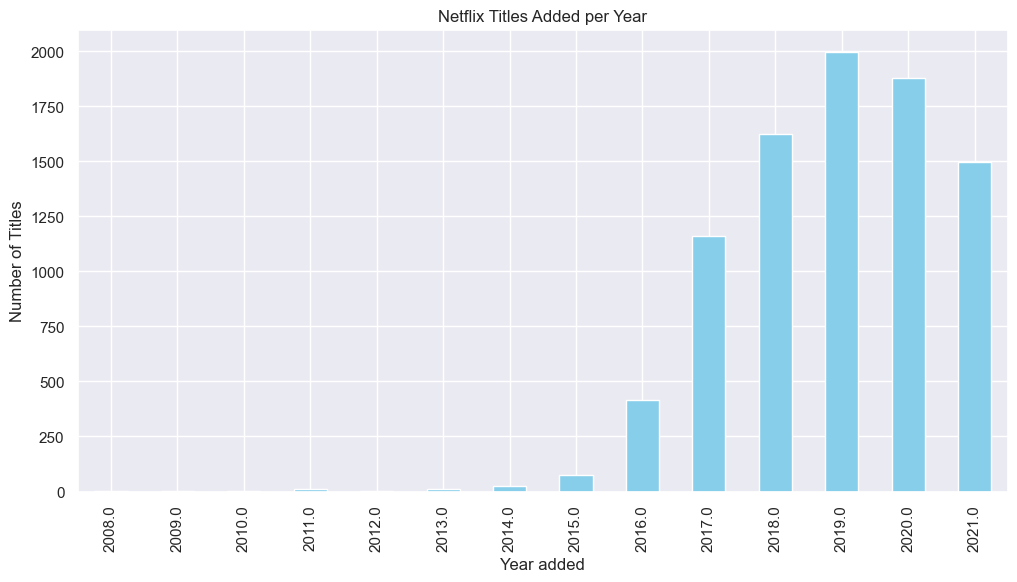

In [15]:
df['year_added'].value_counts().sort_index().plot(kind='bar',figsize=(12,6),color='skyblue')
plt.title('Netflix Titles Added per Year')
plt.xlabel('Year added')
plt.ylabel('Number of Titles')
plt.show()


## 🎭 Step 6: Most Common Genres on Netflix

Netflix offers content across a wide variety of genres. Let’s look at the most common ones.


C:\Users\pgaya\AppData\Local\Temp\ipykernel_21052\3293865527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index,x=top_genres.values,palette='muted')


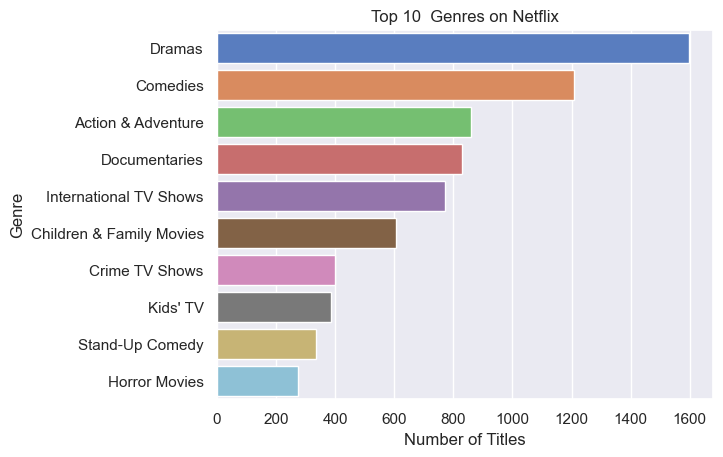

In [19]:
top_genres=df['genre'].value_counts().head(10)
sns.barplot(y=top_genres.index,x=top_genres.values,palette='muted')
plt.title('Top 10  Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


## 🌍Top Countries Producing Netflix Content

Which countries are most represented on Netflix? 

C:\Users\pgaya\AppData\Local\Temp\ipykernel_21052\2697435930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="mako")


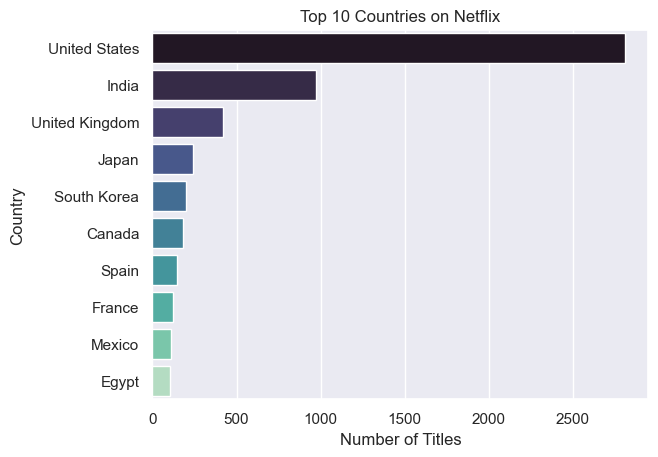

In [20]:
top_countries = df['country'].value_counts().head(10)

sns.barplot(y=top_countries.index, x=top_countries.values, palette="mako")
plt.title("Top 10 Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


## ⏱  Movie Duration Analysis

We analyze how long Netflix movies typically are, in minutes.


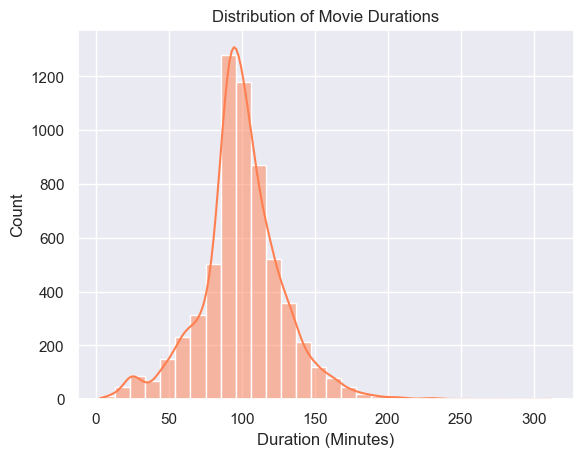

In [21]:
movie_df = df[df['type'] == 'Movie']

sns.histplot(movie_df['duration_mins'].dropna(), bins=30, kde=True, color='coral')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()


## 📆  Monthly Trend of Content Addition




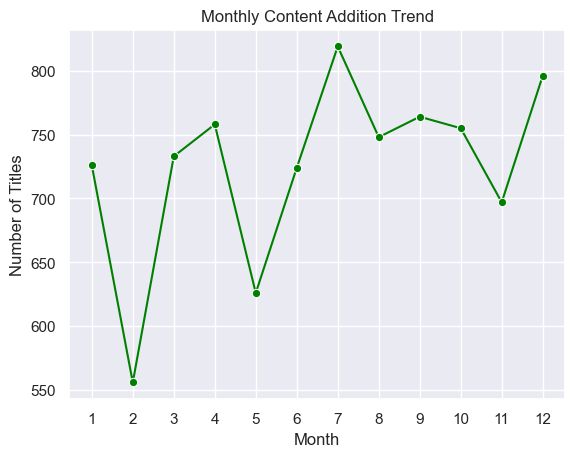

In [23]:
month_counts = df['month_added'].value_counts().sort_index()

sns.lineplot(x=month_counts.index, y=month_counts.values, marker='o', color='green')
plt.title("Monthly Content Addition Trend")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.xticks(range(1,13))
plt.show()


## 🎬 : Most Prolific Directors

Let’s find out which directors have the most titles on Netflix.


C:\Users\pgaya\AppData\Local\Temp\ipykernel_21052\2232825806.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_directors.index, x=top_directors.values, palette="plasma")


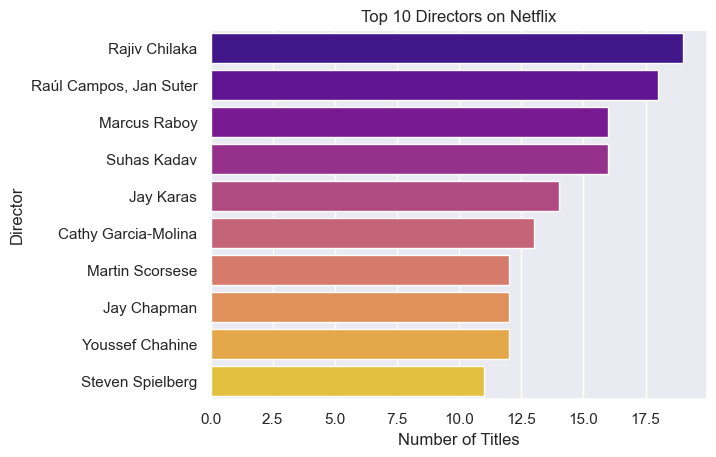

In [24]:
top_directors = df['director'].value_counts().drop('', errors='ignore').head(10)

sns.barplot(y=top_directors.index, x=top_directors.values, palette="plasma")
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


# ✅ Summary of Insights

- Netflix has more **Movies** than **TV Shows**
- Most content was added in **2019–2020**
- Top genres include **Drama**, **Comedy**, and **Documentary**
- **USA** and **India** dominate Netflix’s content library
- Most movies are **80–120 minutes** long
- Peak content addition happens around **Q3 (July–September)**

This project showcases skills in:
- Data cleaning & preprocessing
- Exploratory Data Analysis
- Visual storytelling with Seaborn/Matplotlib
